In [101]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [22]:
data = pd.read_csv('Data/titanic_train.csv')
data['Age'].fillna(data['Age'].mean(), inplace=True)
data['Male'] = data['Sex'].apply(lambda x: 1 if x == 'male' else 0)
y = np.array(data['Survived'])
x = np.array(data[['Male', 'Fare', 'Age']])

Logistic Regression through the API

In [27]:
from sklearn.linear_model import LogisticRegression

lg = LogisticRegression(random_state = 1)
lg = lg.fit(x, y)

In [28]:
from sklearn.metrics import confusion_matrix, classification_report

print classification_report(y, lg.predict(x))
print confusion_matrix(y, lg.predict(x))

             precision    recall  f1-score   support

          0       0.81      0.84      0.83       549
          1       0.73      0.69      0.71       342

avg / total       0.78      0.78      0.78       891

[[462  87]
 [106 236]]


In [30]:
print 'intercept is', lg.intercept_
print 'coefficients are', lg.coef_

intercept is [ 0.84081495]
coefficients are [[-2.31879793  0.01180105 -0.00949468]]


Logistic Regression through maximum likelihood estimation

Define vector of ones to be intercept

In [41]:
xi = np.ones((len(x), 1))

Create new $x$ matrix

In [45]:
xb = np.concatenate((xi, x), axis=1)

Define the sigmoid function

In [46]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

Initialize the weights:

In [529]:
w = np.random.randn(xb.shape[1])

Define the activation function:

In [530]:
a = xb.dot(w.T)

Define our predicted variable

In [531]:
yhat = sigmoid(a)

Define the cost function:

In [532]:
def cost(yhat, t):
    cost = 0
    for i in t:
        if t[i] == 1:
            cost -= np.log(yhat[i])
        else:
            cost -= np.log(1-yhat[i])
    return cost

Gradient descent

In [533]:
lr = .000001

In [534]:
total_cost = []
for i in range(100):
    w += lr*xb.T.dot(y-yhat)
    yhat = sigmoid(xb.dot(w.T))
    total_cost.append(cost(yhat, y))
    if i % 10 == 0:
        print cost(yhat, y)

21493.1877743
18052.7159072
15065.7071562
12313.9366757
9727.70403388
7285.41600913
4985.14417183
2847.27560967
1101.98748625
572.765965848


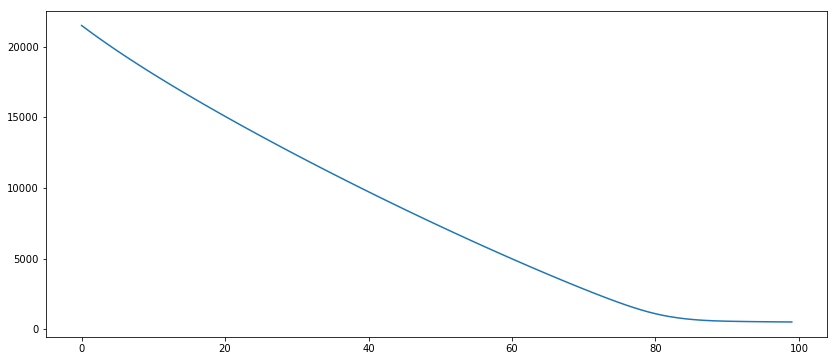

In [535]:
plt.figure(figsize=(14, 6))
plt.plot(total_cost)

In [536]:
print w

[ 1.31160773 -0.69562426  0.00689502 -0.04308749]


Evaluation:

In [224]:
data[data['Sex']=='female']['Survived'].mean()/(1-data[data['Sex']=='female']['Survived'].mean())

2.876543209876542

In [508]:
np.exp(w[0])

0.46402044492230615

In [229]:
np.exp(lg.intercept_)

array([ 2.31825546])

In [305]:
data[data['Sex']=='male']['Survived'].mean()/(1-data[data['Sex']=='male']['Survived'].mean())

0.23290598290598288